<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.176937,99.121511,8.730161,193.028609,186.517562,6.511047
1,0.0,1.0,31.111989,96.989453,0.192738,138.294180,140.109947,-1.815767
2,0.0,2.0,22.802377,21.233789,5.811790,59.847956,55.329732,4.518224
3,0.0,3.0,32.624012,37.817552,-3.037772,77.403791,81.926417,-4.522626
4,0.0,4.0,61.467226,49.385498,-1.896829,118.955895,122.566585,-3.610691
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.936985,99.738878,2.955362,174.631225,175.367170,-0.735944
19996,999.0,16.0,89.927322,81.252982,-12.223409,168.956896,181.598225,-12.641330
19997,999.0,17.0,99.371775,81.653344,-5.160300,185.864819,190.786061,-4.921242
19998,999.0,18.0,74.444054,35.703059,1.395702,121.542815,118.615374,2.927441


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.176937,99.121511,8.730161,193.028609,186.517562,6.511047
1,0.0,1.0,31.111989,96.989453,0.192738,138.294180,140.109947,-1.815767
2,0.0,2.0,22.802377,21.233789,5.811790,59.847956,55.329732,4.518224
3,0.0,3.0,32.624012,37.817552,-3.037772,77.403791,81.926417,-4.522626
4,0.0,4.0,61.467226,49.385498,-1.896829,118.955895,122.566585,-3.610691
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.936985,99.738878,2.955362,174.631225,175.367170,-0.735944
19996,999.0,16.0,89.927322,81.252982,-12.223409,168.956896,181.598225,-12.641330
19997,999.0,17.0,99.371775,81.653344,-5.160300,185.864819,190.786061,-4.921242
19998,999.0,18.0,74.444054,35.703059,1.395702,121.542815,118.615374,2.927441


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    75.176937  99.121511   8.730161  193.028609  186.517562   
      1.0    31.111989  96.989453   0.192738  138.294180  140.109947   
      2.0    22.802377  21.233789   5.811790   59.847956   55.329732   
      3.0    32.624012  37.817552  -3.037772   77.403791   81.926417   
      4.0    61.467226  49.385498  -1.896829  118.955895  122.566585   
...                ...        ...        ...         ...         ...   
999.0 15.0   61.936985  99.738878   2.955362  174.631225  175.367170   
      16.0   89.927322  81.252982 -12.223409  168.956896  181.598225   
      17.0   99.371775  81.653344  -5.160300  185.864819  190.786061   
      18.0   74.444054  35.703059   1.395702  121.542815  118.615374   
      19.0   31.040543  50.061680   2.360062   93.462285   93.681838   

                 e_hat  
rep   index             
0.0   0.0     6.511047  
      1.0    -1.815767  
      2.0     4.518224  
      3.0    -4.522626  
      4.0    -3.610691  
...                ...  
999.0 15.0   -0.735944  
      16.0  -12.641330  
      17.0   -4.921242  
      18.0    2.927441  
      19.0   -0.219553  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    75.176937  99.121511   8.730161  193.028609  186.517562   
      1.0    31.111989  96.989453   0.192738  138.294180  140.109947   
      2.0    22.802377  21.233789   5.811790   59.847956   55.329732   
      3.0    32.624012  37.817552  -3.037772   77.403791   81.926417   
      4.0    61.467226  49.385498  -1.896829  118.955895  122.566585   
...                ...        ...        ...         ...         ...   
999.0 15.0   61.936985  99.738878   2.955362  174.631225  175.367170   
      16.0   89.927322  81.252982 -12.223409  168.956896  181.598225   
      17.0   99.371775  81.653344  -5.160300  185.864819  190.786061   
      18.0   74.444054  35.703059   1.395702  121.542815  118.615374   
      19.0   31.040543  50.061680   2.360062   93.462285   93.681838   

                 e_hat  
rep   index             
0.0   0.0     6.511047  
      1.0    -1.815767  
      2.0     4.518224  
      3.0    -4.522626  
      4.0    -3.610691  
...                ...  
999.0 15.0   -0.735944  
      16.0  -12.641330  
      17.0   -4.921242  
      18.0    2.927441  
      19.0   -0.219553  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.176937,99.121511,8.730161,193.028609,186.517562,6.511047
1,0.0,1.0,31.111989,96.989453,0.192738,138.294180,140.109947,-1.815767
2,0.0,2.0,22.802377,21.233789,5.811790,59.847956,55.329732,4.518224
3,0.0,3.0,32.624012,37.817552,-3.037772,77.403791,81.926417,-4.522626
4,0.0,4.0,61.467226,49.385498,-1.896829,118.955895,122.566585,-3.610691
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.936985,99.738878,2.955362,174.631225,175.367170,-0.735944
19996,999.0,16.0,89.927322,81.252982,-12.223409,168.956896,181.598225,-12.641330
19997,999.0,17.0,99.371775,81.653344,-5.160300,185.864819,190.786061,-4.921242
19998,999.0,18.0,74.444054,35.703059,1.395702,121.542815,118.615374,2.927441


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    75.176937  99.121511   8.730161  193.028609  186.517562   
      1.0    31.111989  96.989453   0.192738  138.294180  140.109947   
      2.0    22.802377  21.233789   5.811790   59.847956   55.329732   
      3.0    32.624012  37.817552  -3.037772   77.403791   81.926417   
      4.0    61.467226  49.385498  -1.896829  118.955895  122.566585   
...                ...        ...        ...         ...         ...   
999.0 15.0   61.936985  99.738878   2.955362  174.631225  175.367170   
      16.0   89.927322  81.252982 -12.223409  168.956896  181.598225   
      17.0   99.371775  81.653344  -5.160300  185.864819  190.786061   
      18.0   74.444054  35.703059   1.395702  121.542815  118.615374   
      19.0   31.040543  50.061680   2.360062   93.462285   93.681838   

                 e_hat  
rep   index             
0.0   0.0     6.511047  
      1.0    -1.815767  
      2.0     4.518224  
      3.0    -4.522626  
      4.0    -3.610691  
...                ...  
999.0 15.0   -0.735944  
      16.0  -12.641330  
      17.0   -4.921242  
      18.0    2.927441  
      19.0   -0.219553  

[20000 rows x 6 columns]

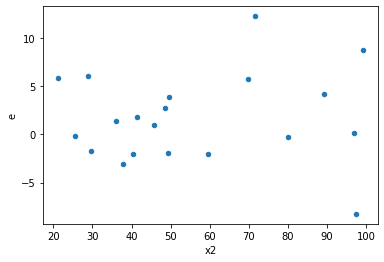

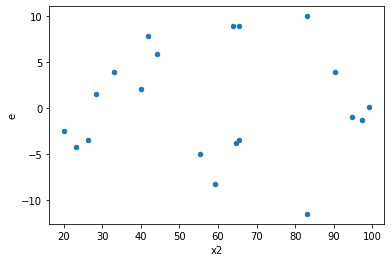

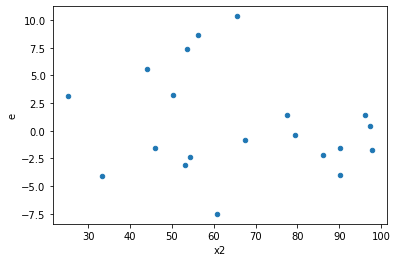

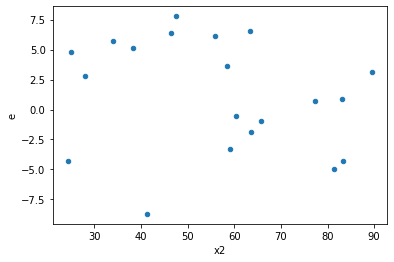

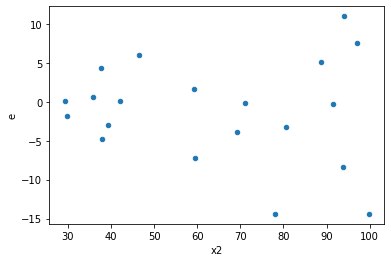

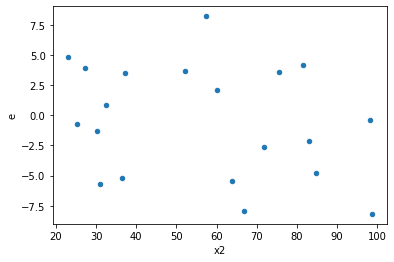

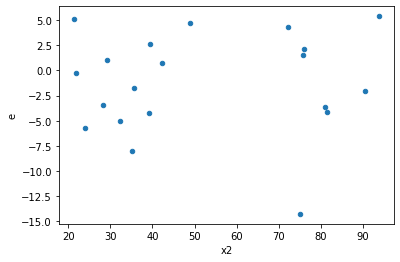

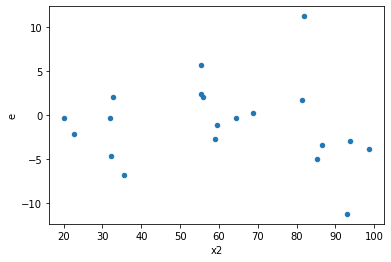

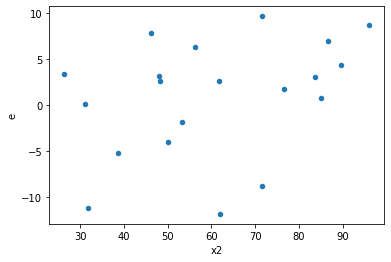

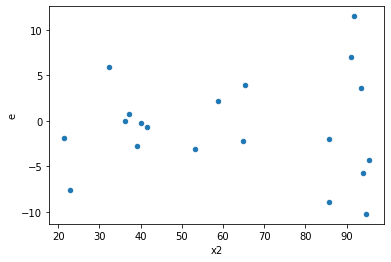

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,46.1055424601987,294.13087806688554,7.684257076699783,49.02181301114759,6.379512361681861,0.04019992464763744,0.9799000376761813,0.02009996232381872,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,90.48372501173849,262.90517706844133,15.080620835289748,43.81752951140689,2.905552098284355,0.21998902240161322,0.8900054887991934,0.10999451120080661,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,172.52005773692994,458.13962503644973,28.75334295615499,76.35660417274163,2.6555731028971223,0.2598011437710859,0.8700994281144571,0.12990057188554294,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,114.38707257180909,127.43425849849959,19.064512095301513,21.239043083083263,1.1140617172320748,0.8990327310335764,0.5504836344832118,0.4495163655167882,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,46.845006344239536,269.6994786939052,7.807501057373256,44.949913115650865,5.757272754154932,0.05128360093454987,0.9743581995327251,0.025641800467274933,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,52.13685804626832,241.8044586547495,8.68947634104472,40.300743109124916,4.63787937585657,0.0840181650945353,0.9579909174527323,0.04200908254726765,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,146.99510582747652,172.66469466050194,24.49918430457942,28.777449110083655,1.174628867325372,0.8500782241478293,0.5749608879260854,0.42503911207391465,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,82.591455084555,284.0701047038868,13.765242514092499,47.345017450647795,3.439461193813127,0.15830672348528196,0.920846638257359,0.07915336174264098,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,122.25822090653746,393.86009616459694,20.376370151089578,65.64334936076615,3.2215428397709998,0.18033013579426438,0.9098349321028678,0.09016506789713219,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,46.1055424601987,294.13087806688554,7.684257076699783,49.02181301114759,6.379512361681861,0.04019992464763744,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,90.48372501173849,262.90517706844133,15.080620835289748,43.81752951140689,2.905552098284355,0.21998902240161322,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,211.0812817028854,80.21128295188869,35.180213617147565,13.368547158648115,0.38000187560350707,0.2641036435233828,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,154.7654617765674,92.18894124557836,25.7942436294279,15.364823540929727,0.5956686988642864,0.5448336821587442,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,172.52005773692994,458.13962503644973,28.75334295615499,76.35660417274163,2.6555731028971223,0.2598011437710859,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,114.38707257180909,127.43425849849959,19.064512095301513,21.239043083083263,1.1140617172320748,0.8990327310335764,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,46.845006344239536,269.6994786939052,7.807501057373256,44.949913115650865,5.757272754154932,0.05128360093454987,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,52.13685804626832,241.8044586547495,8.68947634104472,40.300743109124916,4.63787937585657,0.0840181650945353,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,146.99510582747652,172.66469466050194,24.49918430457942,28.777449110083655,1.174628867325372,0.8500782241478293,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      900
Reject005=0 : Heteroscedasticity    100
Name: Result_test, dtype: int64